In [31]:
import pandas as pd
from pathlib import Path
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
path = "sample_data_with_codes.csv"
df = pd.read_csv(path, low_memory=False)

In [12]:
df.columns

Index(['SeqID', 'Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency',
       'Description', 'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone',
       'Search Conducted', 'Search Disposition', 'Search Outcome',
       'Search Reason', 'Search Reason For Stop', 'Search Type',
       'Search Arrest Reason', 'State', 'VehicleType', 'Year', 'Make', 'Model',
       'Color', 'Violation Type', 'Charge', 'Article',
       'Contributed To Accident', 'Race', 'Gender', 'Driver City',
       'Driver State', 'DL State', 'Arrest Type', 'Geolocation',
       'Search Reason Code', 'Violation Type Code', 'Search Outcome Code',
       'Search Disposition Type Code', 'Search Conducted Type Code'],
      dtype='object')

In [10]:
# Group by 'Make' and 'Year' and aggregate 'Violation Type'
grouped_data = df.groupby(['Make', 'Year'])['Violation Type'].unique().reset_index()

# Display the result
for index, row in grouped_data.iterrows():
    make = row['Make']
    year = row['Year']
    violation_types = ', '.join(row['Violation Type'])
    
    print(f"Make: {make}, Year: {year}, Violation Types: {violation_types}")

Make: ACURA, Year: 2021, Violation Types: Warning
Make: AUDI, Year: 2013, Violation Types: Warning
Make: BMW, Year: 2008, Violation Types: Citation
Make: BMW, Year: 2013, Violation Types: Citation
Make: BMW, Year: 2018, Violation Types: Citation
Make: BMW, Year: 2019, Violation Types: Citation, Warning
Make: CHEV, Year: 2007, Violation Types: Citation
Make: CHEVROLET, Year: 2010, Violation Types: Citation
Make: CHEVY, Year: 2007, Violation Types: ESERO
Make: CHEVY, Year: 2019, Violation Types: Citation
Make: CHRY, Year: 2015, Violation Types: Citation
Make: DODG, Year: 2006, Violation Types: ESERO
Make: DODGE, Year: 2011, Violation Types: Citation, Warning
Make: FORD, Year: 2000, Violation Types: Citation
Make: FORD, Year: 2002, Violation Types: Citation, Warning
Make: FORD, Year: 2004, Violation Types: Warning
Make: FORD, Year: 2012, Violation Types: Citation
Make: FORD, Year: 2013, Violation Types: Citation
Make: FORD, Year: 2015, Violation Types: ESERO
Make: FORD, Year: 2020, Violat

In [21]:
Violation_Type_mapping = {'Citation': 1, 'Warning': 2, 'ESERO': 3}

df['Violation Type Code'] = df['Violation Type'].map(Violation_Type_mapping)

grouped_data = df.groupby(['Make', 'Year'])['Violation Type Code'].mean().reset_index()


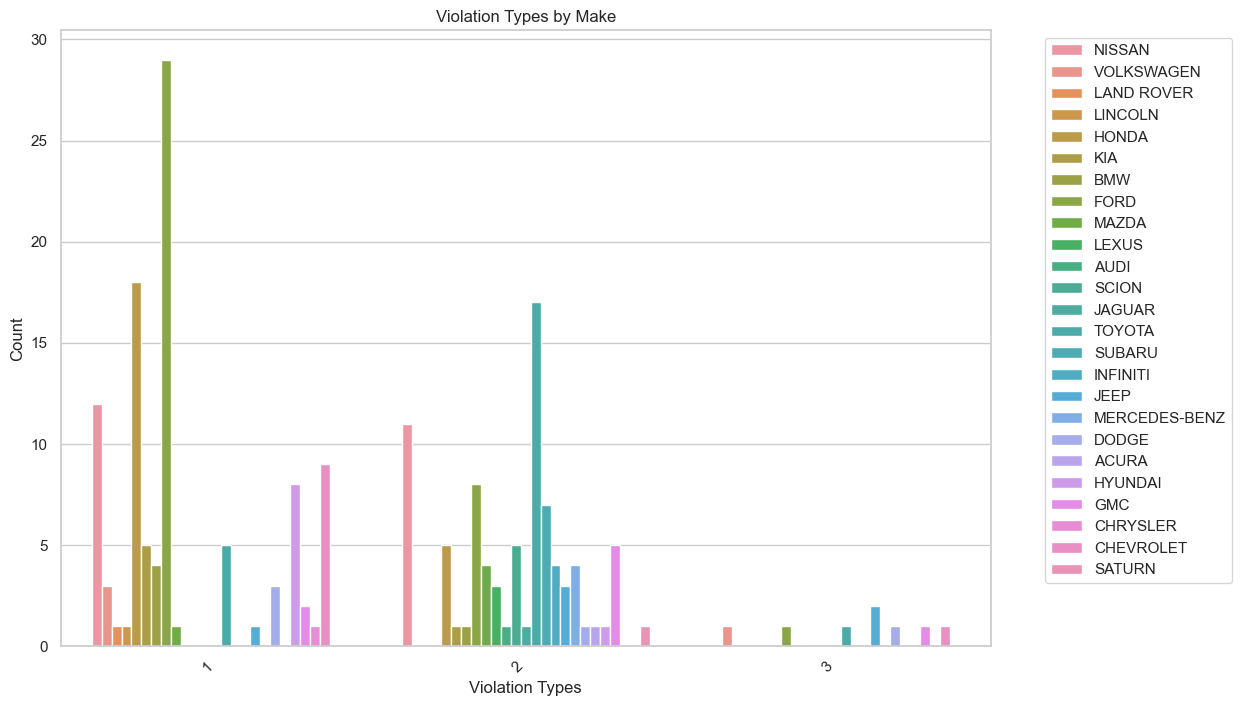

In [20]:
# Define a mapping for make names
make_mapping = {
    'ACURA': 'ACURA',
    'AUDI': 'AUDI',
    'BMW': 'BMW',
    'CHEV': 'CHEVROLET',
    'CHEVROLET': 'CHEVROLET',
    'CHEVY': 'CHEVROLET',
    'CHRY': 'CHRYSLER',
    'DODG': 'DODGE',
    'DODGE': 'DODGE',
    'FORD': 'FORD',
    'GMC': 'GMC',
    'HOND': 'HONDA',
    'HONDA': 'HONDA',
    'HYUN': 'HYUNDAI',
    'INFI': 'INFINITI',
    'INFINITY': 'INFINITI',
    'INFINITI': 'INFINITI',
    'JAGUAR': 'JAGUAR',
    'JEEP': 'JEEP',
    'KIA': 'KIA',
    'LEXS': 'LEXUS',
    'LINC': 'LINCOLN',
    'MAZD': 'MAZDA',
    'MERCEDES BENZ': 'MERCEDES-BENZ',
    'MERZ': 'MERCEDES-BENZ',
    'NISSAN': 'NISSAN',
    'RANGE ROVER': 'LAND ROVER',
    'SATURN': 'SATURN',
    'SCION': 'SCION',
    'SUBA': 'SUBARU',
    'SUBARU': 'SUBARU',
    'TOYOTA': 'TOYOTA',
    'TOYT': 'TOYOTA',
    'TOYTA': 'TOYOTA',
    'VOLK': 'VOLKSWAGEN',
    'VOLKSWAGEN': 'VOLKSWAGEN'
}

# Map the 'Make' column to the standardized make names
df['Standardized Make'] = df['Make'].map(make_mapping)

# Set the Seaborn style
sns.set(style="whitegrid")

# Create a countplot using Seaborn
plt.figure(figsize=(12, 8))
sns.countplot(x='Violation Type Code', hue='Standardized Make', data=df)

# Customize the plot
plt.xlabel('Violation Types')
plt.ylabel('Count')
plt.title('Violation Types by Make')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [22]:
# Table of Violation types based on race and gender
violation_race_gender_table = pd.pivot_table(df, index=['Race', 'Gender'], columns='Violation Type', aggfunc='size', fill_value=0)

# Display the table
print("Table of Violation types based on Race and Gender:")
print(violation_race_gender_table)

Table of Violation types based on Race and Gender:
Violation Type   Citation  ESERO  Warning
Race     Gender                          
ASIAN    M              0      0        2
BLACK    F              8      0        8
         M             39      3       27
HISPANIC F              6      0        6
         M             23      2       15
OTHER    F              1      0        4
         M              9      1        4
WHITE    F             11      3        8
         M              7      1       11


In [23]:
# Table of Violation types based on specified categories
violation_categories_table = pd.pivot_table(df, index=['Alcohol', 'Work Zone', 'Accident', 'Belts', 'Personal Injury', 'Property Damage', 'Fatal'], columns='Violation Type', aggfunc='size', fill_value=0)

# Display the table
print("\nTable of Violation types based on specified categories:")
print(violation_categories_table)



Table of Violation types based on specified categories:
Violation Type                                                          Citation  \
Alcohol Work Zone Accident Belts Personal Injury Property Damage Fatal             
2       2         1        2     2               1               2             1   
                                                 2               2            19   
                  2        1     2               2               2             4   
                           2     1               2               2             3   
                                 2               1               2             0   
                                                 2               2            77   

Violation Type                                                          ESERO  \
Alcohol Work Zone Accident Belts Personal Injury Property Damage Fatal          
2       2         1        2     2               1               2          0   
                           

In [29]:
selected_columns = ['Search Outcome', 'Search Reason Code', 'Search Disposition Type Code', 'Search Conducted Type Code']
selected_df = df[selected_columns]

# Create a contingency table
contingency_table = pd.crosstab(index=selected_df['Search Outcome'],
                                columns=[selected_df['Search Reason Code'],
                                         selected_df['Search Disposition Type Code'],
                                         selected_df['Search Conducted Type Code']],
                                margins=True, margins_name='Total')

# Display the contingency table
print("\nContingency Table:")
print(contingency_table)


Contingency Table:
Search Reason Code           1.0 2.0 Total
Search Disposition Type Code 1.0 1.0      
Search Conducted Type Code   1.0 1.0      
Search Outcome                            
Arrest                         8   0     8
Warning                        0   2     2
Total                          8   2    10


In [33]:
df = pd.read_csv('your_file.csv')

# Check for null values in the DataFrame
null_values = df.isnull().sum()

# Display null values
print("Null values in the DataFrame:")
print(null_values)

FileNotFoundError: [Errno 2] No such file or directory: 'your_file.csv'